<h1 style="text-align: center">
<div style="font-size: 60%">Data Science Discovery</div>
<span style="">Project 2: You and Data Science</span>
</h1>

___

# Section 1: Dataset

### ***🏁 Formula 1 Dataset 🏁***
Formula One *(commonly known as F1)* is one of the biggest international motorsporting events featuring open-wheel, single-seater formula racing cars, known and loved across the world for their speed and aerodynamic precision. Each year, the Formula One season's biggest event, the 'Formula One World Championship' *(or Grand Prix)*, consists of races held in multiple circuits spanning the globe. 

The Formula One dataset I have used in this project consolidates data on every single F1 driver, including data from 2024. This dataset compiles statistics from each driver's participation across multiple championships, sourced from [Wikipedia's Formula One drivers page](https://en.wikipedia.org/wiki/List_of_Formula_One_drivers), dating back to the championship's inception in 1950. 

### ***Column Headings***

The Wikipedia table consists of 11 columns, but we will focus on the following 10: 

- **The driver's name:** 'Driver name'

- **The driver's nationality:** 'Nationality'

- **Range of seasons the driver competed in:** 'Seasons competed'

- **Number of championships the driver won:** 'Drivers' Championships'

- **Number of race starts:** 'Race starts'

    *Number of times the driver participated in a race. This is different from participating in a season, as reserve drivers can participate in a championship, but never drive in a race.*
    
- **Number of times the driver started with a pole position:** 'Pole positions'

    *Pole refers to the best position, usually at the front of the grid. This is awarded as a starting position to the driver who places first in a qualifying race*

- **Number of times the driver won a race:** 'Race wins'

- **Number of times the driver got a podium:** 'Podiums'

    *To get a Podium, a driver must finish in the top 3 positions at the end of a race*

- **Number of times the driver had the fastest lap in a race:** 'Fastest laps'

- **Total number of points:** 'Points[a]'

    *Points are awarded to the drivers who finish in the top ten positions at the end of each race. The driver with the most number of points wins the championship*

### ***Why I chose this dataset***

*Why this dataset is meaningful to me*

I chose this dataset due to my newfound interest in motorsports. Statistics are crucial to sports, and as a new fan, I want to know more about the history of drivers in F1. Moreover, I hope to analyze whether technological improvements might have changed racing across different countries or teams. Using the data science techniques we've learned over the semester, I believe I can uncover some interesting insights that will help me understand the sport better and connect the subjective comments I see online to some concrete numbers.

*How I found this dataset*

While browsing through Kaggle's CSV files, I found several intriguing datasets. However, I was specifically looking for numeric data that I could perform calculations with. I came across a few F1 datasets which sparked my interest, but weren't updated with this year's information. One of these datasets listed its source as Wikipedia. I recalled extracting dataframes from Wikipedia in a microproject, and since I wanted the latest data, I decided to do the same.

### ***Loading the dataset from Wikipedia***

In [2]:
# Import statements
import pandas as pd
import random

In [3]:
# Load the html tables (Returns a list of DataFrames)
df_wiki_tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_Formula_One_drivers")

In [4]:
# Print the contents of df_wiki_tables 
df_wiki_tables

[                                         Formula One
 0  Current season 2024 Formula One World Champion...
 1  Related articles History of Formula One Formul...
 2  Lists Drivers (GP winnersSprint winnersPolesit...
 3   Records Drivers Constructors Engines Tyres Races
 4  Organisations FIA FIA World Motor Sport Counci...
 5                                                vte,
   Symbol                                            Meaning
 0      ~  Currently active world champions (driver compe...
 1      *  Currently active drivers (driver competes in 2...
 2      ^  Former world champions (driver has won the Wor...,
            Driver name     Nationality      Seasons competed  \
 0          Carlo Abate           Italy             1962–1963   
 1     George Abecassis  United Kingdom             1951–1952   
 2        Kenny Acheson  United Kingdom            1983, 1985   
 3    Andrea de Adamich           Italy       1968, 1970–1973   
 4       Philippe Adams         Belgium            

In [5]:
# Assign the dataset we need to a variable df by subscripting from the list
df = df_wiki_tables[2]

In [6]:
# Drop columns we don't need
df = df.drop(columns = ["Race entries"])

# Drop the last row, which consists of labels
df.drop(df.tail(1).index,inplace=True)

In [7]:
# Print the dataset
df

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
0,Carlo Abate,Italy,1962–1963,0,0,0,0,0,0,0
1,George Abecassis,United Kingdom,1951–1952,0,2,0,0,0,0,0
2,Kenny Acheson,United Kingdom,"1983, 1985",0,3,0,0,0,0,0
3,Andrea de Adamich,Italy,"1968, 1970–1973",0,30,0,0,0,0,6
4,Philippe Adams,Belgium,1994,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,1976,0,0,0,0,0,0,0
864,Zhou Guanyu*,China,2022–2024,0,53,0,0,0,2,12
865,Ricardo Zonta,Brazil,"1999–2001, 2004–2005",0,36,0,0,0,0,3
866,Renzo Zorzi,Italy,1975–1977,0,7,0,0,0,0,1


### ***Cleaning our dataset***

The columns containing numeric values are formatted as objects in our dataframe. This is a disadvantage of getting our data from sources other than a pre-formatted CSV file. We cannot analyse our data or use functions like mean() on our dataframe columns if they store the variables as strings or objects. So, we have to change the type of the following columns to int: "Drivers' Championships", 'Race starts', 'Pole positions', 'Race wins', 'Podiums', 'Fastest laps', 'Points[a]'. 

In [8]:
# Print out the types of each column
column_types = df.dtypes
column_types

Driver name               object
Nationality               object
Seasons competed          object
Drivers' Championships    object
Race starts               object
Pole positions            object
Race wins                 object
Podiums                   object
Fastest laps              object
Points[a]                 object
dtype: object

But we cannot directly convert the column info to float values, since the data is not in the format that we want it to be in. For instance, some column values have data such as "34[a]" or "23(24)" or "2 2018-2019" which cannot be converted to a float value. Since it would be too complicated to use regex, I decided to convert the data into a csv and manually clean it. 

In [9]:
# Convert the DataFrame to a CSV
df.to_csv('f1_drivers.csv')

After cleaning the data, I stored it in a CSV titled "updated_f1_drivers.csv". So, we can to load it back into the df variable using pandas.

In [10]:
# Load the new dataset
df = pd.read_csv("updated_f1_drivers.csv")

In [11]:
df["Drivers' Championships"] = df["Drivers' Championships"].astype(float)
df['Race starts'] = df['Race starts'].astype(float)
df['Pole positions'] = df['Pole positions'].astype(float)
df['Race wins'] = df['Race wins'].astype(float)
df['Podiums'] = df['Podiums'].astype(float)
df['Fastest laps'] = df['Fastest laps'].astype(float)
df['Points[a]'] = df['Points[a]'].astype(float)

In [12]:
# Print the DataFrame
df

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
0,Carlo Abate,Italy,1962–1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,George Abecassis,United Kingdom,1951–1952,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,Kenny Acheson,United Kingdom,"1983, 1985",0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,Andrea de Adamich,Italy,"1968, 1970–1973",0.0,30.0,0.0,0.0,0.0,0.0,6.0
4,Philippe Adams,Belgium,1994,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,Zhou Guanyu*,China,2022–2024,0.0,49.0,0.0,0.0,0.0,2.0,12.0
865,Ricardo Zonta,Brazil,"1999–2001, 2004–2005",0.0,36.0,0.0,0.0,0.0,0.0,3.0
866,Renzo Zorzi,Italy,1975–1977,0.0,7.0,0.0,0.0,0.0,0.0,1.0


____

# Section 2: Exploratory Data Analysis

### ***Descriptive Statistics***

Using descriptive statistics, we can find thoroughly explore our dataset! 

Using the measures of central tendency like the median can help us find the 50th percentile for different columns like Points and Race wins. This will help us judge the skill of a specific driver. Are all drivers competitive, or do a few exceptionally good drivers skew our data? By finding the standard deviation of points, we can see whether the best drivers are really big outliers or just a little bit better than the others.

We can use the exploratory data analysis methods to find which countries have the most F1 drivers, and which ones have the best stats. Using our dataset, we can find trends in the popularity of F1 around the world.

To get a broad overview of the data, I want to find factors such as podium rate, pole rate and race win rate. This will help me even out the varying years of experience among different drivers and compare their racing talent. This can be done by getting the number of years they have been an F1 driver and dividing it by the number in the column of interest to get the mean. 



### ***Size and shape of the dataset***

In [13]:
# Find the total number of drivers in F1
number_of_drivers = len(df)
number_of_drivers

868

There have been 868 drivers in F1 since it's beginning in 1950! However, upon taking a closer look at the dataset, we notice rows where a driver's total number of starts is 0. This means that the driver's name was entered in the Grand Prix, but they did not race. This usually happens when a driver is a 'reserve driver'. We can count the number of reserve drivers who have never raced in a Grand Prix:

In [14]:
# Find the number of reserve drivers
number_of_reserve_drivers = len(df[df["Race starts"] == 0])
number_of_reserve_drivers

85

This is a large number of reserve drivers! These drivers can be considered outliers when analyzing our data, since they might skew our measures of central tendency, like the median. So, we should create a new dataframe excluding the reserve drivers to perform our analysis on:

In [15]:
# Create a dataframe of drivers who have participated in at least one Grand Prix
df_gp_drivers = df[df["Race starts"] != 0]
df_gp_drivers

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
1,George Abecassis,United Kingdom,1951–1952,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,Kenny Acheson,United Kingdom,"1983, 1985",0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,Andrea de Adamich,Italy,"1968, 1970–1973",0.0,30.0,0.0,0.0,0.0,0.0,6.0
4,Philippe Adams,Belgium,1994,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,Walt Ader,United States,1950,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
862,Alessandro Zanardi,Italy,"1991–1994, 1999",0.0,41.0,0.0,0.0,0.0,0.0,1.0
864,Zhou Guanyu*,China,2022–2024,0.0,49.0,0.0,0.0,0.0,2.0,12.0
865,Ricardo Zonta,Brazil,"1999–2001, 2004–2005",0.0,36.0,0.0,0.0,0.0,0.0,3.0
866,Renzo Zorzi,Italy,1975–1977,0.0,7.0,0.0,0.0,0.0,0.0,1.0


### ***Median and Mean***

In [16]:
# Find the mean for each column

mean_wins = df_gp_drivers["Race wins"].mean()
mean_podiums = df_gp_drivers["Podiums"].mean()
mean_points = df_gp_drivers["Points[a]"].mean()

print(f"The average number of wins is {mean_wins} and the average number of podiums is {mean_podiums}. The average number of points is {mean_points}")

The average number of wins is 1.4163473818646233 and the average number of podiums is 4.264367816091954. The average number of points is 65.61983397190293


In [17]:
# Find the median for each column

median_wins = df_gp_drivers["Race wins"].median()
median_podiums = df_gp_drivers["Podiums"].median()
median_points = df_gp_drivers["Points[a]"].median()

print(f"The median number of wins is {median_wins} and the median number of podiums is {median_podiums}. The median number of points is {median_points}")

The median number of wins is 0.0 and the median number of podiums is 0.0. The median number of points is 0.0


This is quite shocking! As the median value represents the 50th percentile of the data, we draw the conclusion that half of the Grand Prix drivers have never won a race or placed in the top 10. (Drivers in the top ten get at least one point)

Looking at both the mean and median, we can say that the averages are affected by exceptional drivers, while the medians reflect the stats of most drivers in the dataset.

In [18]:
# Find the standard deviations for each column to confirm this

std_wins = df_gp_drivers["Race wins"].std()
std_podiums = df_gp_drivers["Podiums"].std()
std_points = df_gp_drivers["Points[a]"].std()

print(f"The standard deviation of wins is {std_wins} and the standard deviation of podiums is {std_podiums}. The standard deviation of points is {std_points}")


The standard deviation of wins is 7.008970389808145 and the standard deviation of podiums is 15.521549901107461. The standard deviation of points is 298.458175837321


The standard deviations are pretty high, especially for points! This confirms that there are just few drivers who do really well consistently.

### ***Grouping by country***

Just last week, China's first F1 driver, Zhou Guanyu, raced on home soil for the first time in the Shanghai Circuit! With F1 gaining drivers and supporters from around the globe, let's find out which countries have the best stats and most drivers.

In [19]:
# Find the top 10 countries in terms of drivers
df_nation_drivers = df_gp_drivers.groupby('Nationality').size()
df_nation_drivers = df_nation_drivers.reset_index(name='Driver Count')
df_nation_drivers = df_nation_drivers.sort_values(by='Driver Count', ascending=False)
df_nation_drivers.head(10)

,Nationality,Driver Count
43,United States,152
42,United Kingdom,149
22,Italy,83
16,France,71
6,Brazil,32
46,West Germany,31
40,Switzerland,22
0,Argentina,21
4,Belgium,21
23,Japan,18


In [20]:
# Group by countries and keep only required columns
df_nation = df_gp_drivers.groupby("Nationality").sum().reset_index()
cols = ["Nationality", "Drivers' Championships", "Pole positions", "Race wins", "Podiums", "Fastest laps", "Points[a]"]
df_nation = df_nation[cols]

In [21]:
# Find the top 10 countries in terms of points
df_nation_points = df_nation.sort_values(by="Points[a]", ascending=False)
df_nation_points.head(10)

,Nationality,Drivers' Championships,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
42,United Kingdom,20.0,292.0,309.0,754.0,265.0,11267.78
17,Germany,12.0,165.0,176.0,395.0,155.0,7747.50
15,Finland,4.0,70.0,57.0,245.0,95.0,4397.50
16,France,4.0,79.0,81.0,310.0,91.0,3554.47
38,Spain,2.0,27.0,35.0,129.0,29.0,3431.50
6,Brazil,8.0,126.0,101.0,293.0,88.0,3415.00
2,Australia,4.0,35.0,43.0,132.0,62.0,2958.50
30,Netherlands,3.0,37.0,58.0,104.0,32.0,2725.50
22,Italy,3.0,48.0,43.0,207.0,51.0,1989.30
26,Mexico,0.0,3.0,8.0,46.0,13.0,1665.00


We can see that UK takes the first place in every column! There's no doubt that UK is the most successful F1 country.

But I wonder if this were always the case.. Let's explore our dataset a bit further.

### ***Trends in F1 around the world***

The 60s were considered the golden age of motorsport. With better technology, the sport gained popularity in the Western world. Let's analyze our data by the years to see which countries saw a surge in popularity.

For the sake of uniformity, we'll decide which group a driver belongs to based on which season they first competed in. Recall that the first F1 race took place in 1950.

In [22]:
# Split into three datasets : before the 60s, during the 60s, and after the 60s
df_before_60 = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("195")]
df_during_60 = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("196")]
df_after_60 = df_gp_drivers[~df_gp_drivers.index.isin(df_before_60.index) & ~df_gp_drivers.index.isin(df_during_60.index)]

Now, let's group each DataFrame by nationality and find which countries were in the top ten

#### Before the 60s

In [23]:
# Find the top 10 countries in terms of drivers before 60s
df_b6_drivers = df_before_60.groupby('Nationality').size()
df_b6_drivers = df_b6_drivers.reset_index(name='Driver Count')
df_b6_drivers = df_b6_drivers.sort_values(by='Driver Count', ascending=False)
df_b6_drivers.head(10)

,Nationality,Driver Count
20,United States,114
19,United Kingdom,72
7,France,24
9,Italy,24
22,West Germany,20
3,Belgium,12
0,Argentina,11
17,Switzerland,8
4,Brazil,4
5,East Germany,3


In [24]:
# Group by countries and keep only required columns
df_nation_b60 = df_before_60.groupby("Nationality").sum().reset_index()
cols = ["Nationality", "Drivers' Championships", "Pole positions", "Race wins", "Podiums", "Fastest laps", "Points[a]"]
df_nation_b60 = df_nation_b60[cols]

In [25]:
# Find the top 10 countries in terms of points before 60s
df_nation_b60_points = df_nation_b60.sort_values(by="Points[a]", ascending=False)
df_nation_b60_points.head(10)

,Nationality,Drivers' Championships,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
19,United Kingdom,3.0,39.0,43.0,112.0,39.0,843.28
20,United States,1.0,20.0,18.0,76.0,23.0,544.00
9,Italy,3.0,20.0,21.0,73.0,20.0,442.80
0,Argentina,5.0,32.0,26.0,53.0,31.0,349.28
2,Australia,3.0,13.0,14.0,31.0,12.0,253.00
13,New Zealand,0.0,0.0,4.0,27.0,3.0,188.50
7,France,0.0,0.0,2.0,23.0,2.0,171.47
22,West Germany,0.0,1.0,2.0,9.0,2.0,85.00
16,Sweden,0.0,1.0,1.0,1.0,0.0,39.00
3,Belgium,0.0,0.0,0.0,4.0,0.0,37.00


#### During the 60s

In [26]:
# Find the top 10 countries in terms of drivers for during 60s
df_d6_drivers = df_during_60.groupby('Nationality').size()
df_d6_drivers = df_d6_drivers.reset_index(name='Driver Count')
df_d6_drivers = df_d6_drivers.sort_values(by='Driver Count', ascending=False)
df_d6_drivers.head(10)

,Nationality,Driver Count
14,United Kingdom,29
15,United States,24
11,South Africa,14
6,Italy,14
4,Canada,7
5,France,6
13,Switzerland,5
0,Argentina,3
9,New Zealand,3
7,Mexico,3


In [27]:
# Group by countries and keep only required columns
df_nation_d60 = df_during_60.groupby("Nationality").sum().reset_index()
cols = ["Nationality", "Drivers' Championships", "Pole positions", "Race wins", "Podiums", "Fastest laps", "Points[a]"]
df_nation_d60 = df_nation_d60[cols]

In [28]:
# Find the top 10 countries in terms of points during 60s
df_nation_d60_points = df_nation_d60.sort_values(by="Points[a]", ascending=False)
df_nation_d60_points.head(10)

,Nationality,Drivers' Championships,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
14,United Kingdom,6.0,58.0,58.0,111.0,56.0,939.0
15,United States,1.0,19.0,15.0,41.0,13.0,353.0
9,New Zealand,1.0,6.0,8.0,44.0,12.0,331.0
3,Belgium,0.0,13.0,8.0,26.0,14.0,188.0
2,Austria,1.0,10.0,6.0,13.0,3.0,107.0
5,France,0.0,0.0,1.0,10.0,5.0,99.0
6,Italy,0.0,1.0,3.0,10.0,4.0,95.0
7,Mexico,0.0,0.0,2.0,7.0,1.0,75.0
13,Switzerland,0.0,2.0,2.0,6.0,4.0,71.0
11,South Africa,0.0,0.0,0.0,3.0,0.0,27.0


#### After the 60s

In [29]:
# Find the top 10 countries in terms of drivers after 60s
df_a6_drivers = df_after_60.groupby('Nationality').size()
df_a6_drivers = df_a6_drivers.reset_index(name='Driver Count')
df_a6_drivers = df_a6_drivers.sort_values(by='Driver Count', ascending=False)
df_a6_drivers.head(10)

,Nationality,Driver Count
37,United Kingdom,48
19,Italy,45
13,France,41
5,Brazil,28
20,Japan,18
38,United States,14
14,Germany,13
2,Austria,12
26,Netherlands,11
33,Spain,10


In [30]:
# Group by countries and keep only required columns
df_nation_a60 = df_after_60.groupby("Nationality").sum().reset_index()
cols = ["Nationality", "Drivers' Championships", "Pole positions", "Race wins", "Podiums", "Fastest laps", "Points[a]"]
df_nation_a60 = df_nation_a60[cols]

In [31]:
# Find the top 10 countries in terms of points after 60s
df_nation_a60_points = df_nation_a60.sort_values(by="Points[a]", ascending=False)
df_nation_a60_points.head(10)

,Nationality,Drivers' Championships,Pole positions,Race wins,Podiums,Fastest laps,Points[a]
37,United Kingdom,11.0,195.0,208.0,531.0,170.0,9485.5
14,Germany,12.0,165.0,176.0,395.0,155.0,7747.5
12,Finland,4.0,70.0,57.0,245.0,95.0,4397.5
33,Spain,2.0,27.0,35.0,128.0,29.0,3421.5
5,Brazil,8.0,126.0,101.0,293.0,88.0,3411.5
13,France,4.0,79.0,78.0,277.0,84.0,3284.0
26,Netherlands,3.0,37.0,58.0,104.0,32.0,2721.5
1,Australia,1.0,22.0,29.0,101.0,50.0,2705.5
23,Mexico,0.0,3.0,6.0,39.0,12.0,1590.0
19,Italy,0.0,27.0,19.0,124.0,27.0,1451.5


Although UK has a clear grip on the top spot throughout the decades, we can observe the surge in the popularity of the sport in other countries and across continents in South Africa and New Zealand during the 60s. The change in the points also reflects how countries other than the UK are also vying for the top spot: Germany has only one less championship than the UK after the 60s. We couldn't have found these insights from our original grouping, as it wouldn't have accounted for the headstart that the UK has had since the beginning of the sport. (Not to mention the fact that Germany wasn't one country, but two: West and East Germany)

### ***Adding rate columns***

Now that we have a dataset with float values, let's calculate rates! Since each driver has competed in a different number of races, we cannot compare their statistics as is. If we divide our variable of interest by the number of races the driver has participated in, we can get comparable values. 

In [32]:
# Find the rate of podiums for each driver
df_gp_drivers["Podium Rate"] = df_gp_drivers["Podiums"] / df_gp_drivers["Race starts"]

/var/folders/0_/qxrcnt3954n9q9wbzqz1xq_00000gn/T/ipykernel_15429/939791596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp_drivers["Podium Rate"] = df_gp_drivers["Podiums"] / df_gp_drivers["Race starts"]


The number of race starts also includes qualifying races. Since getting a pole is essentially the same as winning a race - a driver would have to place first - we can add those values together to get a total win rate. This will help us see whether a driver is consistent. 

In [33]:
# Find the rate of wins for each driver
df_gp_drivers["Win Rate"] = (df_gp_drivers["Race wins"] + df_gp_drivers["Pole positions"]) / df_gp_drivers["Race starts"]

/var/folders/0_/qxrcnt3954n9q9wbzqz1xq_00000gn/T/ipykernel_15429/2861753652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp_drivers["Win Rate"] = (df_gp_drivers["Race wins"] + df_gp_drivers["Pole positions"]) / df_gp_drivers["Race starts"]


In [34]:
# Find the rate of points for each driver
df_gp_drivers["Avg Points"] = df_gp_drivers["Points[a]"] / df_gp_drivers["Race starts"]

/var/folders/0_/qxrcnt3954n9q9wbzqz1xq_00000gn/T/ipykernel_15429/9277974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp_drivers["Avg Points"] = df_gp_drivers["Points[a]"] / df_gp_drivers["Race starts"]


In [35]:
# Print the dataset
df_gp_drivers

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a],Podium Rate,Win Rate,Avg Points
1,George Abecassis,United Kingdom,1951–1952,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Kenny Acheson,United Kingdom,"1983, 1985",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Andrea de Adamich,Italy,"1968, 1970–1973",0.0,30.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.200000
4,Philippe Adams,Belgium,1994,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,Walt Ader,United States,1950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Alessandro Zanardi,Italy,"1991–1994, 1999",0.0,41.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.024390
864,Zhou Guanyu*,China,2022–2024,0.0,49.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.244898
865,Ricardo Zonta,Brazil,"1999–2001, 2004–2005",0.0,36.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.083333
866,Renzo Zorzi,Italy,1975–1977,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142857


----

# Section 3: Exploratory Data Visualization

Since we have analysed drivers according to country, let's now look at drivers according to the decade! 

With our new rate columns, we can calculate the average of each of the three rates. We can then plot a line graph of how these values have changed over the decades!

In [36]:
# Divide the dataframe according to 8 decades

columns = ["Podium Rate", "Win Rate", "Avg Points"]

df_50s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("195")][columns].mean() # Returns a series
df_50s = pd.DataFrame([df_50s]) 
df_50s["Decade"] = "1950s"

df_60s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("196")][columns].mean()
df_60s = pd.DataFrame([df_60s])
df_60s["Decade"] = "1960s"

df_70s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("197")][columns].mean()
df_70s = pd.DataFrame([df_70s])
df_70s["Decade"] = "1970s"

df_80s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("198")][columns].mean()
df_80s = pd.DataFrame([df_80s])
df_80s["Decade"] = "1980s"

df_90s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("199")][columns].mean()
df_90s = pd.DataFrame([df_90s])
df_90s["Decade"] = "1990s"

df_00s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("200")][columns].mean()
df_00s = pd.DataFrame([df_00s])
df_00s["Decade"] = "2000s"

df_2010s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("201")][columns].mean()
df_2010s = pd.DataFrame([df_2010s])
df_2010s["Decade"] = "2010s"

df_2020s = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("202")][columns].mean()
df_2020s = pd.DataFrame([df_2020s])
df_2020s["Decade"] = "2020s"

In [37]:
# Concat all the dataframes
decades_dfs = [df_50s, df_60s, df_70s, df_80s, df_90s, df_00s, df_2010s, df_2020s]
df_decade = pd.concat(decades_dfs).reset_index()
df_decade = df_decade.drop(columns="index")
df_decade

,Podium Rate,Win Rate,Avg Points,Decade
0,0.060861,0.028707,0.454737,1950s
1,0.034530,0.021300,0.344269,1960s
2,0.041488,0.023079,0.356711,1970s
3,0.036981,0.024018,0.337149,1980s
4,0.045299,0.028968,0.481029,1990s
5,0.062786,0.041364,1.540535,2000s
6,0.045586,0.025704,2.032244,2010s
7,0.006173,0.000000,1.107649,2020s


<Axes: xlabel='Decade'>

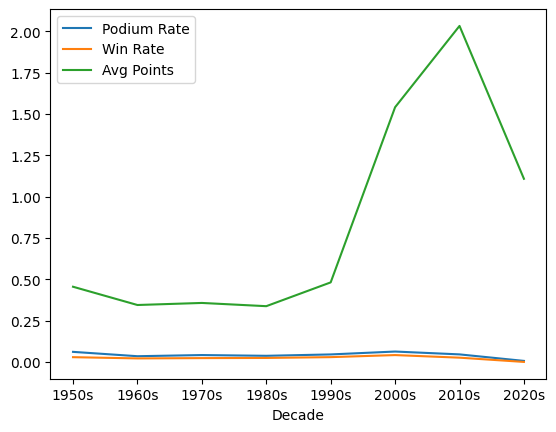

In [38]:
# Plot the graph
df_decade.plot.line(x="Decade")

The line graph plots the Podium rate, Win Rate and Points Rate's averages using three lines over the decades. From the graph, we can see that there is almost no change in the Win Rate and Podium Rate averages, and their values are quite close to each other. The points average, however, skyrocketed in the 2010s, and dipped again in the 2020s (This is likely due to the fact that we have data only until 2024). 

Max Verstappen, the current defending champion, started his career in the 2010s. The peak could be due to him being an outlier. Let's create a dot plot to see whether this is true.

<Axes: xlabel='Driver name', ylabel='Avg Points'>

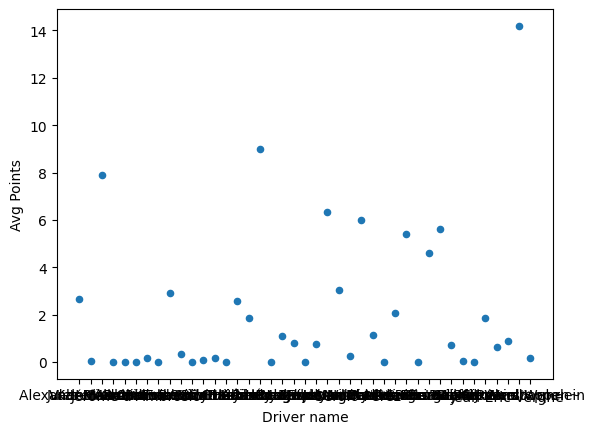

In [39]:
# Plot the 2010 drivers' graph
df_2010_drivers_points = df_gp_drivers[df_gp_drivers["Seasons competed"].str.startswith("201")]
df_2010_drivers_points.plot.scatter(x="Driver name", y="Avg Points")

Clearly, this is due to outliers! Let's create a plot of just the outliers so we can see their names more clearly.

In [40]:
# Filter for only those drivers with a points rate above 4
df_2010_drivers_points_outliers = df_2010_drivers_points[df_2010_drivers_points["Avg Points"] >= 4]
df_2010_drivers_points_outliers

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a],Podium Rate,Win Rate,Avg Points
101,Valtteri Bottas*,Finland,2013–2024,0.0,227.0,20.0,10.0,67.0,19.0,1797.0,0.295154,0.132159,7.916300
447,Charles Leclerc*,Monaco,2018–2024,0.0,128.0,23.0,5.0,32.0,9.0,1150.0,0.250000,0.218750,8.984375
565,Lando Norris*,United Kingdom,2019–2024,0.0,109.0,1.0,0.0,15.0,6.0,691.0,0.137615,0.009174,6.339450
594,Sergio Pérez*,Mexico,2011–2024,0.0,262.0,3.0,6.0,39.0,11.0,1571.0,0.148855,0.034351,5.996183
653,Daniel Ricciardo*,Australia,2011–2024,0.0,244.0,3.0,8.0,32.0,16.0,1317.0,0.131148,0.045082,5.397541
679,George Russell*,United Kingdom,2019–2024,0.0,109.0,1.0,1.0,11.0,6.0,502.0,0.100917,0.018349,4.605505
686,Carlos Sainz Jr.*,Spain,2015–2024,0.0,187.0,5.0,3.0,21.0,3.0,1051.5,0.112299,0.042781,5.622995
811,Max Verstappen~,Netherlands,2015–2024,3.0,190.0,37.0,58.0,102.0,32.0,2696.5,0.536842,0.500000,14.192105


/var/folders/0_/qxrcnt3954n9q9wbzqz1xq_00000gn/T/ipykernel_15429/4246256366.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df_2010_drivers_points_outliers.plot.scatter(x="Driver name", y="Avg Points").set_xticklabels(df_2010_drivers_points_outliers["Driver name"], rotation=60)


[Text(0, 0, 'Valtteri Bottas*'),
 Text(1, 0, 'Charles Leclerc*'),
 Text(2, 0, 'Lando Norris*'),
 Text(3, 0, 'Sergio Pérez*'),
 Text(4, 0, 'Daniel Ricciardo*'),
 Text(5, 0, 'George Russell*'),
 Text(6, 0, 'Carlos Sainz Jr.*'),
 Text(7, 0, 'Max Verstappen~')]

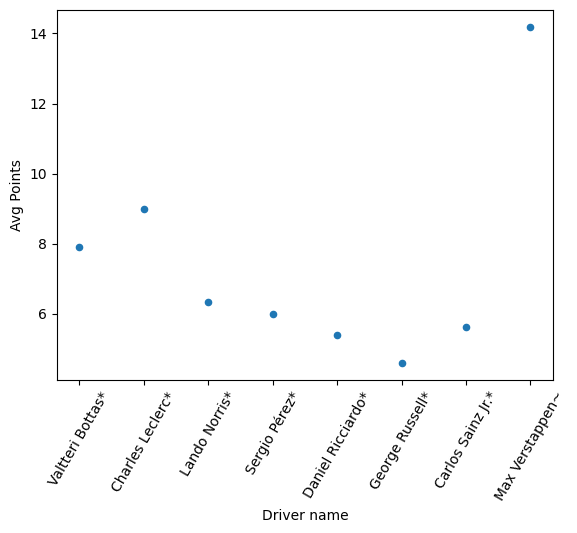

In [41]:
# Plot only the outliers
df_2010_drivers_points_outliers.plot.scatter(x="Driver name", y="Avg Points").set_xticklabels(df_2010_drivers_points_outliers["Driver name"], rotation=60)

We can clearly see that the biggest outlier in the graph is, in fact, Max Verstappen!

____

# Section 4: Data Science 

One of the most popular F1 rivalries at the moment is between fans of Lewis Hamilton, 7-time world champion from UK, and fans of Max Verstappen, 3-time consecutive world champion from the Netherlands, and current defending champion. I want to know what the result of a simulated championship would be. Would one of them take the crown, or would it be someone else entirely?

A real race has many factors that affect its outcome: weather conditions, how well a car is engineered, the altitude and bends in a circuit, etc. However, we will stick to creating a low-level simulation that only accounts for a driver's overall statistics. Specifically, we will only consider the driver's Win Rate and Podium Rate.

First, we need to create a function that takes in the participating drivers' data. For the sake of simplicity, the drivers will be: Verstappen, Hamilton and three randomly sampled drivers from the ones who are currently participating in F1. Using the drivers' win rate, and podium rate, we can find a percentage of the time the driver would win. This is done by adding all the rates and dividing each rate by the total sum to get "weights". We can use this percentage as the probability of the driver winning and get randomly generated numbers with that probability to find who would win. 

Next, we can run this simulation 23 times (the approximate number of races in a season) to simulate a championship and return a DataFrame containing the points the driver won in each race. By adding the values in every column, we can find the total number of points for each driver in our simulated championship and declare the winner!

In [42]:
# Create an overall rate depending on the Win rate and Podium rate
df_gp_drivers["Overall Rate"] = (df_gp_drivers["Win Rate"] + df_gp_drivers["Podium Rate"]).astype(float)

/var/folders/0_/qxrcnt3954n9q9wbzqz1xq_00000gn/T/ipykernel_15429/2807471827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp_drivers["Overall Rate"] = (df_gp_drivers["Win Rate"] + df_gp_drivers["Podium Rate"]).astype(float)


In [43]:
# Get Max Verstappen's data
verstappen = df_gp_drivers[df_gp_drivers["Driver name"] == "Max Verstappen~"]
verstappen

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a],Podium Rate,Win Rate,Avg Points,Overall Rate
811,Max Verstappen~,Netherlands,2015–2024,3.0,190.0,37.0,58.0,102.0,32.0,2696.5,0.536842,0.5,14.192105,1.036842


In [44]:
# Get Hamilton's data
hamilton = df_gp_drivers[df_gp_drivers["Driver name"] == "Lewis Hamilton~"]
hamilton

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a],Podium Rate,Win Rate,Avg Points,Overall Rate
338,Lewis Hamilton~,United Kingdom,2007–2024,7.0,337.0,104.0,103.0,197.0,65.0,4658.5,0.58457,0.614243,13.823442,1.198813


In [45]:
# Get all the current drivers' data, except for Verstappen and Hamilton
curr_drivers = df_gp_drivers[(df_gp_drivers["Seasons competed"].str.endswith("2024")) & (df_gp_drivers["Driver name"] != "Lewis Hamilton~") & (df_gp_drivers["Driver name"] != "Max Verstappen~")]
curr_drivers

,Driver name,Nationality,Seasons competed,Drivers' Championships,Race starts,Pole positions,Race wins,Podiums,Fastest laps,Points[a],Podium Rate,Win Rate,Avg Points,Overall Rate
11,Alexander Albon*,Thailand,"2019–2020, 2022–2024",0.0,86.0,0.0,0.0,2.0,0.0,228.0,0.023256,0.000000,2.651163,0.023256
17,Fernando Alonso~,Spain,"2001, 2003–2018, 2021–2024",2.0,382.0,22.0,32.0,106.0,25.0,2298.0,0.277487,0.141361,6.015707,0.418848
61,Oliver Bearman*,United Kingdom,2024,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.000000,0.000000,6.000000,0.000000
101,Valtteri Bottas*,Finland,2013–2024,0.0,227.0,20.0,10.0,67.0,19.0,1797.0,0.295154,0.132159,7.916300,0.427313
287,Pierre Gasly*,France,2017–2024,0.0,135.0,0.0,1.0,4.0,3.0,394.0,0.029630,0.007407,2.918519,0.037037
375,Nico Hülkenberg*,Germany,"2010, 2012–2020, 2022–2024",0.0,208.0,1.0,0.0,0.0,2.0,534.0,0.000000,0.004808,2.567308,0.004808
447,Charles Leclerc*,Monaco,2018–2024,0.0,128.0,23.0,5.0,32.0,9.0,1150.0,0.250000,0.218750,8.984375,0.468750
486,Kevin Magnussen*,Denmark,"2014–2020, 2022–2024",0.0,168.0,1.0,0.0,1.0,2.0,187.0,0.005952,0.005952,1.113095,0.011905
565,Lando Norris*,United Kingdom,2019–2024,0.0,109.0,1.0,0.0,15.0,6.0,691.0,0.137615,0.009174,6.339450,0.146789
568,Esteban Ocon*,France,"2016–2018, 2020–2024",0.0,138.0,0.0,1.0,3.0,0.0,422.0,0.021739,0.007246,3.057971,0.028986


In [46]:
# Create a function for finding the rankings of the five drivers
def simulateChampionship():

    data = []
    for i in range (23): # For loop for the number of races
        other_drivers = curr_drivers.sample(n=3)

        # Find the overall rate for each driver
        ver = verstappen["Overall Rate"].sum()
        ham = hamilton["Overall Rate"].sum()
        d1 = other_drivers.iloc[0]["Overall Rate"].sum()
        d2 = other_drivers.iloc[1]["Overall Rate"].sum()
        d3 = other_drivers.iloc[2]["Overall Rate"].sum()

        # Find the probability of picking each driver
        sum = ver + ham + d1 + d2 + d3
        prob_ver = ver / sum
        prob_ham = ham / sum
        prob_d1 = d1 / sum
        prob_d2 = d2 / sum
        prob_d3 = d3 / sum

        drivers = ["Verstappen", "Hamilton", "Driver1", "Driver2", "Driver3"]

        # Create a list of 100 of the same 5 drivers
        list = []

        for i in range ((100*round(prob_ver, 2)).astype(int)):
            list.append(drivers[0])

        for i in range ((100*round(prob_ham, 2)).astype(int)):
            list.append(drivers[1])

        for i in range ((100*round(prob_d1, 2)).astype(int)):
            list.append(drivers[2])

        for i in range ((100*round(prob_d2, 2)).astype(int)):
            list.append(drivers[3])

        for i in range ((100*round(prob_d3, 2)).astype(int)):
            list.append(drivers[4])

        # If the probability of getting a driver is 0, then add their name once
        if (100*round(prob_d1, 2)).astype(int) == 0:
            list.append(drivers[2])
        if (100*round(prob_d2, 2)).astype(int) == 0:
            list.append(drivers[3])
        if (100*round(prob_d3, 2)).astype(int) == 0:
            list.append(drivers[4])

        # Randomly pick drivers without replacement to rank them from P1 to P5
        driver1 = random.choice(list)

        while driver1 in list:
            list.remove(driver1)

        driver2 = random.choice(list)

        while (driver2 in list):
            list.remove(driver2)

        driver3 = random.choice(list)

        while (driver3 in list):
            list.remove(driver3)

        driver4 = random.choice(list)

        while (driver4 in list):
            list.remove(driver4)

        driver5 = random.choice(list)

        # Give each driver scores according to their position
        d = {driver1 : 25, driver2: 18, driver3: 15, driver4: 12, driver5: 10} 
        data.append(d)

    df_championship = pd.DataFrame(data)
    return df_championship
        

In [47]:
df_championship = simulateChampionship()
df_championship

,Hamilton,Verstappen,Driver3,Driver1,Driver2
0,25,18,15,12,10
1,25,15,18,10,12
2,18,25,10,12,15
3,18,15,10,12,25
4,15,18,10,25,12
5,15,25,10,18,12
6,18,25,12,10,15
7,18,15,10,12,25
8,12,18,10,25,15
9,18,25,10,12,15


In [48]:
# Find the total number of points for each driver
verstappen_pts = df_championship["Verstappen"].sum()
hamilton_pts = df_championship["Hamilton"].sum()
d1_pts = df_championship["Driver1"].sum()
d2_pts = df_championship["Driver2"].sum()
d3_pts = df_championship["Driver3"].sum()

print(f"Verstappen's points are: {verstappen_pts}, Hamilton's points are {hamilton_pts}, Driver1's points are {d1_pts}, Driver2's points are {d2_pts}, and Driver3's points are {d3_pts}")

Verstappen's points are: 473, Hamilton's points are 428, Driver1's points are 312, Driver2's points are 328, and Driver3's points are 299


Running the simulation multiple times, we notice that the winner is almost always Verstappen or Hamilton, with Hamilton getting slightly more wins. This can be attributed to the fact that Verstappen's overall rate is 1.036842 and Hamilton's is slightly higher at 1.19881. None of the other current drivers' overall rates come close.

____

# Section 5: Overall Summary 

My dataset contains information about how many races each F1 driver has participated in, the number of podiums, poles and wins they got, and some qualitative information like their name, seasons they participated in, and their nationality. I was able to obtain this from Wikipedia, and clean it to convert its object values into floats, to make it easier for analysis.

I obtained a subsection of the original dataframe to get information only on those drivers who had participated in atleast one race in F1. By finding the measures of central tendency, I was able to determine that over 50% of drivers have never won a race, and the average statistics we obtained were a result of outliers. This is particularly evident from the high standard deviation values that we got: The standard deviation of wins is 7.008970389808145 and the standard deviation of podiums is 15.521549901107461. The standard deviation of points is 298.458175837321

Grouping our drivers by country, I found that UK had the second highest number of drivers and the best statistics. While analyzing trends and how F1's statistics might have changed in the 1960s, we can see that UK was consistently at the top, but also that the popularity of F1 had spread across the globe to parts of Africa and Australia. 

To ensure uniformity across drivers, I added rate columns for wins and podiums. This helped me create my line graph that plotted how the average of these rates and points changed across different decades of the sport. Upon inspecting the unmistakable peak in the average points chart, we found that this was due to a few drivers who had outperformed everyone else, mainly, Max Verstappen, who had 14.192105 points on average.

Moreover, I simulated a championship between Lewis Hamilton, Max Verstappen, and three random drivers. This was done by simulating a race 23 times. Each race consisted of finding the Win Rate and Podium Rate of each driver and calculating the probability of them being chosen. I then used random.choice on the driver's names with weighted probabilities and ranked all five accordingly. Assigning each driver points according to their position, we added these values to a list, which was then used to create a dataFrame of 23 rows, each simulating a race. By adding the points for each driver from the DataFrame, I found that Lewis Hamilton had the highest success rate, with Max Verstappen coming in a close second.

____